<a href="https://colab.research.google.com/github/veyselberk88/Data-Science-Tools-and-Ecosystem/blob/main/lab09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Initialize Otter
import otter
grader = otter.Notebook("lab09.ipynb")

<img src="./ccsf.png" alt="CCSF Logo" width=200px style="margin:0px -5px">

# Lab 09 - Confidence Intervals

---

## References

* [Sections 13.0 - 13.4 of the Textbook](https://ccsf-math-108.github.io/textbook/chapters/13/Estimation.html)
* [datascience Documentation](https://datascience.readthedocs.io/)
* [Code Reference](https://ccsf-math-108.github.io/materials-sp25/resources/code-reference.html)

---

## Lab Assignment Reminders

- 🚨 Make sure to run the code cell at the top of this notebook that starts with `# Initialize Otter` to load the auto-grader.
- Your tasks are categorized as auto-graded (📍) and manually graded (📍🔎):
    - **For all auto-graded tasks:**
        - Replace the `...` in the provided code cell with your own code.
        - Run the `grader.check` code cell to execute tests on your code.
        - There are no hidden auto-grader tests in the lab assignments. This means if you pass the tests, you can assume you've completed the task successfully.
    - **For all manually graded tasks:**
        - You may need to provide your own response to the provided prompt. Replace the template text "_Type your answer here, replacing this text._" with your own words.
        - You might need to produce a graphic or another output using code. Replace the `...` in the code cell to generate the image, table, etc.
        - In either case, check your response with a classmate, a tutor, or the instructor before moving on.
- Throughout this assignment and all future ones, please **do not re-assign variables** throughout the notebook! _For example, if you use `max_temperature` in your answer to one question, do not reassign it later on. Otherwise, you may fail tests that you thought you were passing previously!_
- You may [submit](#Submit-Your-Assignment-to-Canvas) this assignment as many times as you want before the deadline. Your instructor will score the last version you submit once the deadline has passed.
- **Collaborating on labs is encouraged!** You should rarely remain stuck for more than a few minutes on questions in labs, so ask an instructor or classmate for help. (Explaining things is beneficial, too -- the best way to solidify your knowledge of a subject is to explain it.) However, please don't just share answers.

---

## Configure the Notebook

Run the following cell to configure this Notebook.

In [ ]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

---

## Allied Intelligence Preliminaries

In World War II, the Allies (led by the US, the UK, and the Soviet Union) wanted to know how many military tanks the Germans had produced. However, they didn't get to see every single tank produced by the Germans – rather, all they saw was a random **sample** of tanks, and they wanted to use this sample to estimate the total number of tanks produced by the Germans. This problem, known as the [German tank problem](https://en.wikipedia.org/wiki/German_tank_problem), is a famous application of statistical estimation in a real-world scenario.

To frame the problem more precisely, consider that tanks were given serial numbers ranging from 1 to `N`, where `N` was the total number of tanks produced. The Allies were trying to estimate `N`, a **population parameter**, using the serial numbers of the tanks in their sample. We will assume that the Allies' sample is a simple random sample of the population (drawn without replacement).

<br>

<center><img src='./tank.jpg' alt='a tank' width=400></center>

<br>


In this lab, given **just** a random sample of serial numbers, we'll estimate `N`, and then we'll use simulation to find out how accurate our estimate likely is, without ever looking at the whole population. This is an example of **statistical inference** - inferring something about a population using just the information in a sample.

**Note:** As you continue to learn about Data Science and other related subjects, it is important that you understand that a lot of advancements in technology related to these subjects have been funded through military budgets. In 2024, of the [United States Department of Defense's 841.4 billion dollar budget](https://www.defense.gov/News/Releases/Release/Article/3326875/department-of-defense-releases-the-presidents-fiscal-year-2024-defense-budget/#:~:text=The%20FY%202024%20budget%20request,credible%20forces%20across%20all%20domains.), 145 billion dollar were allocated for research, development, testing, and evaluation (the largest in history).  This awareness is important because there have been many times throughout history when those developing/learning about new technologies were unaware of their original intended use(s) or the context in which they were developed.

---

### Task 01 📍

Is `N` a population parameter or a statistic?  If we compute a number using our random sample that's an estimate of `N`, is that a population parameter or a statistic?  

Assign either 1, 2, 3, or 4 to the variable `task_01` below.

1. `N` is a population parameter.  An estimate of `N` from our random sample is a population parameter.
2. `N` is a population parameter.  An estimate of `N` from our random sample is a statistic.
3. `N` is a statistic.  An estimate of `N` from our random sample is a population parameter.
4. `N` is a statistic.  An estimate of `N` from our random sample is a statistic.

In [ ]:
task_01 = 2

In [ ]:
grader.check("task_01")

task_01 results: All test cases passed!
task_01 - 1 message: ✅ task_01 was assigned to an integer 1, 2, 3, or 4.
task_01 - 2 message: ✅ task_01 was assigned to the correct integer.

To make the situation realistic, we're going to hide the true number of tanks from you.  You'll have access only to this random sample:

In [ ]:
observations = Table.read_table("serial_numbers.csv")
num_observations = observations.num_rows
display(observations)
print(f'There are {num_observations} tank serial numbers in the sample data.')

serial_number
47
42
57
79
26
23
36
64
83
135


There are 17 tank serial numbers in the sample data.


---

### Task 02 📍🔎

<!-- BEGIN QUESTION -->

Complete the implementation of the function `plot_serial_numbers`, which draws a histogram of any `Table` (`serial_number_table`) of serial numbers like `observations`.  

* The function should take one argument, a `Table` with a single column column called `'serial_number'` (like `observations`).
* It should plot a histogram of the values in the `'serial_number'` column **using bins of width 1** ranging from **1 to 200 (inclusive)** but return nothing.

Then, call that function to make a histogram of `observations`.

**Note**: Your histogram should have bars that are all the same height and the x-axis should range from 0 to 200. It will almost look like a barcode. Check your histogram with a classmate, a tutor, or the instructor before moving on.

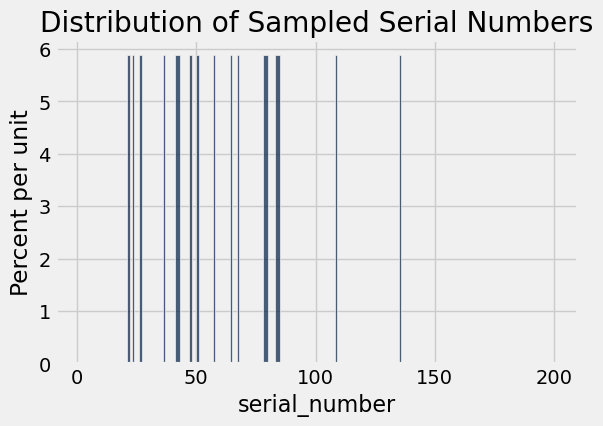

In [ ]:
def plot_serial_numbers(serial_number_table):
    bins = np.arange(1,201,1)
    serial_number_table.hist('serial_number',bins=bins)
    plt.title('Distribution of Sampled Serial Numbers')
    plt.show()

# Call your function.
plot_serial_numbers(observations)

<!-- END QUESTION -->

---

### Task 03 📍

Since we are trying to estimate the population maximum, `N`, a natural statistic to use is the sample **maximum**. In other words, we can estimate the total number of tanks using the biggest serial number in our sample.

Below, complete the implementation of the function `calculate_max_based_estimate`, which computes that statistic on a given array of serial numbers. It should take as its argument an array of serial numbers (`nums`) and return their maximum.

After that, use it to compute an estimate of `N` using the serial numbers in `observations`. Call the estimate `max_based_estimate`.

In [ ]:
def calculate_max_based_estimate(nums):
    return np.max(nums)

max_based_estimate = calculate_max_based_estimate(observations.column(0))
max_based_estimate

135

In [ ]:
grader.check("task_03")

task_03 results: All test cases passed!
task_03 - 1 message: ✅ calculate_max_based_estimate seems to be working.
task_03 - 2 message: ✅ max_based_estimate is a number.
task_03 - 3 message: ✅ max_based_estimate is a serial number in the sample.
task_03 - 4 message: ✅ max_based_estimate seems correct.

---

### Task 04 📍

Another way to estimate `N` is to take **twice the mean** of the serial numbers in our sample. This is based on the idea that the mean of a random sample of the numbers `1` through `N` usually falls about halfway between `1` and `N`. So we can estimate `N` by doubling this mean.

Below, write a function called `calculate_mean_based_estimate` that computes that statistic. It should take as its argument an array of serial numbers and return twice their mean.

After that, use it to compute an estimate of `N` using the serial numbers in `observations`. Call the estimate `mean_based_estimate`.

In [ ]:
def calculate_mean_based_estimate(nums):
    return (np.mean(nums)*2)

mean_based_estimate = calculate_mean_based_estimate(observations.column(0))
mean_based_estimate

122.47058823529412

In [ ]:
grader.check("task_04")

task_04 results: All test cases passed!
task_04 - 1 message: ✅ mean_based_estimate is a number.
task_04 - 2 message: ✅

---

### Task 05 📍

Look at the values of `max_based_estimate` and `mean_based_estimate` that we happened to get for our dataset.

In [ ]:
max_based_estimate

135

In [ ]:
mean_based_estimate

122.47058823529412

`max_based_estimate` and `mean_based_estimate` give you two ways to estimate `N`.  Which of the following statements are true?

Assign an array of integers to the variable `task_05` where the integers in the array correspond to the following statements that are true.

1. The `max_based_estimate` could be smaller than `N`.
2. The `max_based_estimate` could be equal to `N`.
3. The `max_based_estimate` could be greater than `N`.
4. The `mean_based_estimate` could be smaller than `N`.
5. The `mean_based_estimate` could be equal to `N`.
6. The `mean_based_estimate` could be greater than `N`.

In [ ]:
task_05 = make_array(1,2,4,5,6)

In [ ]:
grader.check("task_05")

task_05 results: All test cases passed!
task_05 - 1 message: ✅ task_05 is assigned to an integer 1, 2, 3, 4, 5, or 6.
task_05 - 2 message: ✅ Good work not selecting 3.
task_05 - 3 message: ✅ task_05 seems correct!

---

The bias of an estimator refers to its tendency to consistently overestimate or underestimate the true parameter value across repeated sampling. When using/choosing an estimator, you want to consider its bias.

---

## Resampling

We can't just confidently proclaim that `max_based_estimate` or `mean_based_estimate` are equal to `N`, because we don't know what `N` actually is.  What if we're really far off? We want to get a sense of the accuracy of our estimates.

If we had access to the entire population, we could repeatedly draw samples from the population and compute our estimate using each sample. This would give an empirical distribution of the estimate, which we could use to see how wrong our estimates tend to be.

Unfortunately, we **don't** have access to the entire population (i.e. we don't know the value of `N`). All we have access to is a single sample of serial numbers. How do we tell how accurate our estimates are without being able to sample repeatedly from the population to create an empirical distribution? 🤔

<br>

One strategy is to repeatedly sample from our sample, or "**resample**", and use those resamples to compute an empirical distribution of our estimate. Let's talk about why this is a reasonable strategy.
- When we tried to determine `N`, the number of tanks, we would have liked to use the whole population.  Since we had only a sample, we used that to estimate `N` instead.
- Similarly, now we would like to use the population of serial numbers to **run a simulation** to help us understand how different estimates of `N` might have turned out. But we still only have our **sample**, so can we use that instead? **We can!**
- Since large random samples tend to resemble the populations they are drawn from, and our sample is relatively large, we can treat our sample as if it is the population, and sample from it.

When we resample from our original sample, we sample **uniformly at random with replacement** and create a resample **that has the same number of elements as the original sample**.

Here's an analogy between estimating `N` and computing the empirical distribution of our estimates:

$$\text{computing }N\text{ from the population}$$
$$\text{is to}$$
$$\text{computing an estimate of }N\text{ from a sample}$$

$$\text{as}$$

$$\text{computing an empirical distribution of estimates of }N\text{ using samples from the population}$$
$$\text{is to}$$
$$\text{computing an empirical distribution of estimates of }N\text{ using resamples from a sample}$$

The process of resampling from our original sample is known as **bootstrap resampling**.

---

### Task 06 📍

Complete the implementation of the function `simulate_resample`.  
- It should take no arguments.
- It should generate a resample (again, **with replacement**) from the observed serial numbers in `observations` and return that resample.
- The resample should be a Table like `observations`.

***Hint:*** Use the `.sample` `Table` method.

In [ ]:
def simulate_resample():
    return observations.sample()

# This is a little magic to make sure that you see the same results we did - don't change it.
np.random.seed(123)

# Don't change the line below!
one_resample = simulate_resample()
one_resample

serial_number
108
57
57
36
41
42
47
50
135
47


In [ ]:
grader.check("task_06")

task_06 results: All test cases passed!
task_06 - 1 message: ✅ Your simulate_resample function returns a Table.
task_06 - 2 message: ✅ Your simulate_resample seems to be working correctly.

---

Later, we'll use many resamples at once to see what estimates typically look like.  We don't often pay attention to single resamples, so it's easy to misunderstand them.  Let's examine some individual resamples before we start using them.

---

### Task 07 📍🔎

<!-- BEGIN QUESTION -->

Make a histogram of your `one_resample` **and** a separate histogram of the original observations. Make sure to use the function `plot_serial_numbers` that you defined earlier in the lab.

**Note:** Since this is a manually-scored task, check your histograms with a classmate, a tutor, or the instructor before moving on.

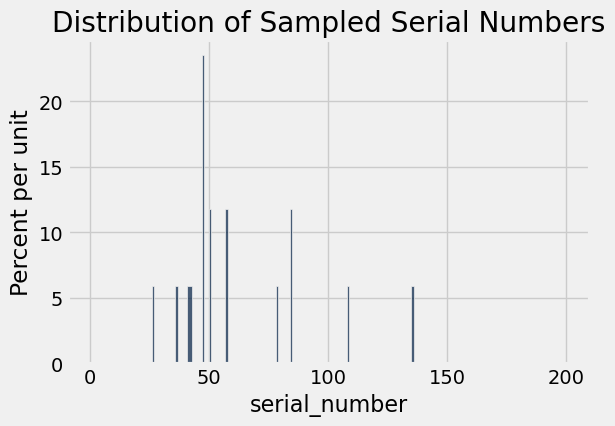

In [ ]:
# Histogram of resample.
plot_serial_numbers(one_resample)

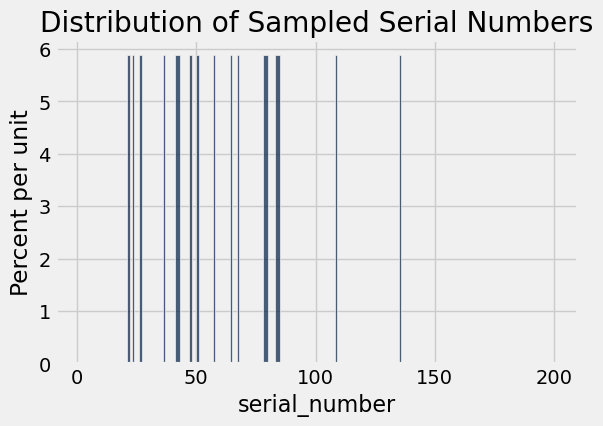

In [ ]:
# Histogram of original sample.
plot_serial_numbers(observations)

<!-- END QUESTION -->

---

### Task 08 📍

Which of the following are true:

1. In the plot of the resample, there are no bars at locations that weren't there in the plot of the original observations.
2. In the plot of the original observations, there are no bars at locations that weren't there in the plot of the resample.
3. There are no duplicate serial numbers in the resample.
4. There are no duplicate serial numbers in the original observations.

Assign `task_08` to an array of the numbers corresponding to the correct statements

In [ ]:
task_08 = make_array(1,4)

In [ ]:
grader.check("task_08")

task_08 results: All test cases passed!
task_08 - 1 message: ✅ task_08 is an array.
task_08 - 2 message: ✅ task_08 is an array of numbers 1, 2, 3, or 4.
task_08 - 3 message: ✅ task_08 seems correct.

---

### Task 09 📍🔎

<!-- BEGIN QUESTION -->

Create 2 more resamples. For each resample:

1. Plot a histogram
2. Compute the max-based and mean-based estimates using that resample.

**Note:** This is a manually scored task, so check your results with a classmate, a tutor, or the instructor before moving on.

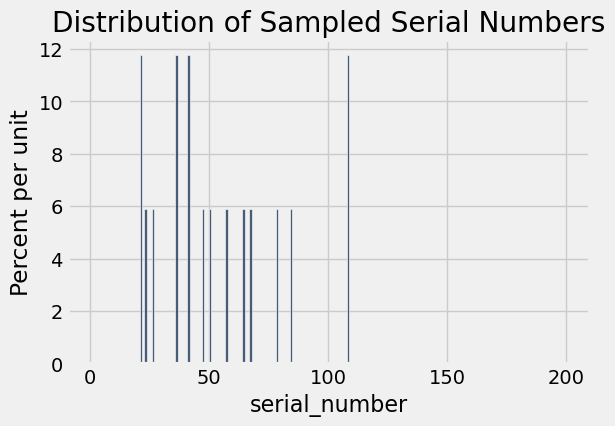

Mean-based estimate for resample 1: 106.823529412
Max-based estimate for resample 1: 108




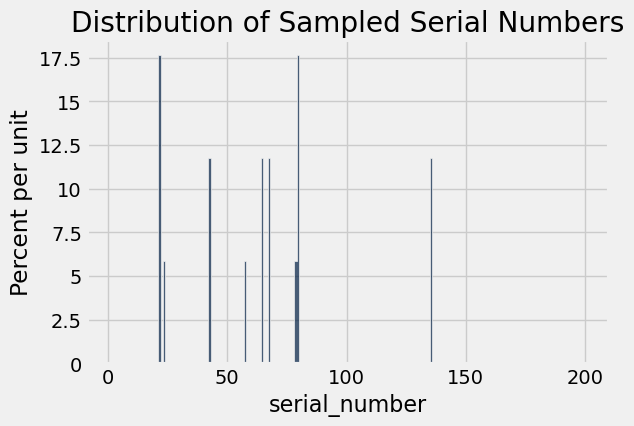

Mean-based estimate for resample 2: 126.352941176
Max-based estimate for resample 2: 135




In [ ]:
# The template uses np.arange(2) because you need to create 2 resamples.
for i in np.arange(2):
    resample = observations.sample()

    # Plot a histogram of this resample.
    plot_serial_numbers(resample)
    plt.show() # Don't change this line!

    # Calculate the mean-based and max-based estimates based on this resample.
    mean_based_estimate_resample = calculate_mean_based_estimate(resample.column(0))
    max_based_estimate_resample = calculate_max_based_estimate(resample.column(0))

    # Don't change the following 3 lines:
    print(f"Mean-based estimate for resample {i+1}:", mean_based_estimate_resample)
    print(f"Max-based estimate for resample {i+1}:", max_based_estimate_resample)
    print('\n')

<!-- END QUESTION -->

---

There's a good chance that you'll find that the max-based estimates from the resamples are both exactly 135 (run the cell a few times and you'll almost surely see this happen). You'll also probably find that the two mean-based estimates differ from the sample mean-based estimate (and from each other).

---

### Task 10 📍

Compute **the probability that a max-based estimate from one *resample* of our observations sample is 135** and assign it to the variable `task_10` below. It may be useful to recall that the size of `observations` is 17.

Note that this is a **math** question, not a programming one. It may help to figure out your answer on paper and then assign `task_10` to an expression that evaluates to the right value (a number between 0 and 1, inclusive).

In [ ]:
task_10 = 1-(16/17)**17
task_10

0.6432138052537073

In [ ]:
grader.check("task_10")

task_10 results: All test cases passed!
task_10 - 1 message: ✅ task_10 is assigned to a number.
task_10 - 2 message: ✅ task_10 is above 60%.
task_10 - 3 message: ✅ task_10 seems correct.

---

The correct answer is high, above 60%. Think about why a mean-based estimate from a resample is less likely to be exactly equal to the mean-based estimate from the original sample as compared to a max-based estimate.

---

## Resampling via Simulation

Since resampling from a large random sample looks just like sampling from a population, the code should look almost the same, too. That means we can write a function that simulates either sampling from a population or resampling from a sample.  If we pass it a population as its argument, it will do the former; if we pass it a sample, it will do the latter.

---

### Task 11 📍

Complete the implementation of the function `simulate_estimates`. It should take 4 arguments:
- `original_tbl`: A `Table` from which the data should be sampled, with a single column named `'serial_number'`.
- `sample_size`: The size of each sample, an integer. (For example, to do resampling, we would pass the number of rows in `original_tbl` for this argument.)
- `statistic`: A **function** that computes a statistic on a sample. This argument is the **name of a function** that takes an array of serial numbers as its argument and returns a number (e.g. `calculate_mean_based_estimate`).
- `repetitions`: The number of repetitions to perform (i.e. the number of resamples to create).

It should simulate `repetitions` samples **with replacement** from the given `Table`. For each of those samples, it should compute the statistic on that sample. Then it should return an array containing the value of that statistic for each sample (this means that the length of the returned array should be equal to `repetitions`).

**Notes:**

* The code below the function definition provides an example use of your function and describes how you can verify that you've written it correctly. Don't change that code since we check `example_estimates`.
* We'll check a few things about your function, but check your histogram with a classmate, a tutor, or the instructor before moving on. The histogram you see should be a roughly bell-shaped curve centered at 1000 with most of its area in the interval [800, 1200].


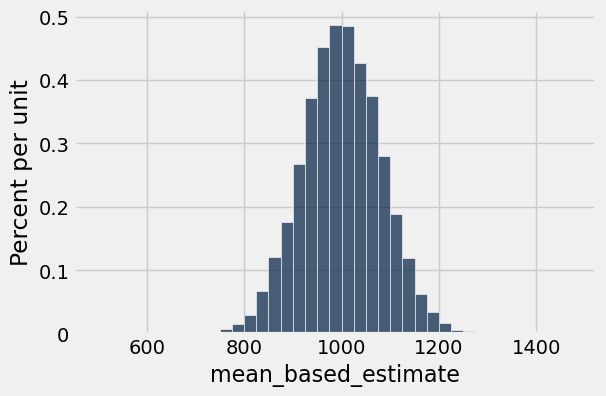

In [ ]:
def simulate_estimates(original_tbl, sample_size, statistic, repetitions):
    stats = make_array()
    for i in range(repetitions):
        resample=original_tbl.sample(sample_size,with_replacement=True)
        resample_col = resample.column('serial_number')
        new_stat = statistic(resample_col)
        stats = np.append(stats,new_stat)
    return stats

# This should generate an empirical histogram of twice-mean estimates
# of N from samples of size 50 if N is 1000.
# Notice that the statistic argument is calculate_mean_based_estimate.
# Don't change this code!
example_estimates = simulate_estimates(
    Table().with_column('serial_number', np.arange(1, 1000+1)),
    50,
    calculate_mean_based_estimate,
    10_000)
Table().with_column('mean_based_estimate', example_estimates).hist(0, bins=np.arange(500, 1500, 25))

In [ ]:
grader.check("task_11")

task_11 results: All test cases passed!
task_11 - 1 message: ✅ example_estimates is an array with the correct number of items.
task_11 - 2 message: ✅ simulate_estimates seems to work correctly for the mean-based estimate function.
task_11 - 3 message: ✅ simulate_estimates seems to work correctly for the max-based estimate function.

---

Now we can go back to the sample we actually observed (`observations`) and estimate how much our mean-based estimate of `N` would have varied from sample to sample.

---

### Task 12 📍🔎

<!-- BEGIN QUESTION -->

Using the bootstrap procedure (`simulate_estimates`) and the sample `observations`, simulate the approximate distribution of **mean-based estimates** of `N`. Use 5,000 repetitions. Store the estimates in `bootstrap_estimates`. (Note that this only requires one line of code; call your `simulate_estimates` function.)

**Note:** We have provided code that plots a histogram, allowing you to visualize the simulated estimates. Check your histogram with a classmate, a tutor, or the instructor before moving on.

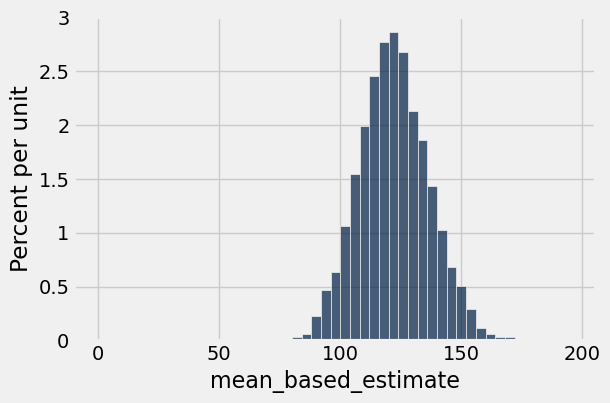

In [ ]:
bootstrap_estimates = simulate_estimates(observations,17,calculate_mean_based_estimate,5000)
Table().with_column('mean_based_estimate', bootstrap_estimates).hist('mean_based_estimate', bins=np.arange(0, 200, 4))

<!-- END QUESTION -->

---

### Task 13 📍

Compute an interval that covers the middle 95% of the bootstrap estimates in `bootstrap_estimates`.  Verify that your interval looks like it covers 95% of the area in the histogram above.

**Note:** Since you create random samples, the auto-grader tests for this task are not perfect in assessing if your code is completely correct. This means you should check your results with a classmate, a tutor, or the instructor before moving on.

In [ ]:
left_end =percentile(2.5 , bootstrap_estimates)
right_end =percentile(97.5, bootstrap_estimates)
print("Middle 95% of bootstrap estimates: [{:f}, {:f}]".format(left_end, right_end))

Middle 95% of bootstrap estimates: [94.705882, 151.176471]


In [ ]:
percentile(5, bootstrap_estimates)

99.058823529411768

In [ ]:
grader.check("task_13")

task_13 results: All test cases passed!
task_13 - 1 message: ✅ left_end and right_end are numbers.
task_13 - 2 message: ✅ left_end seems reasonable.
task_13 - 3 message: ✅ right_end seems reasonable.

---

### Task 14 📍

Let's say that `N`, the population parameter we've been trying to estimate, is actually 150. Write code that simulates the sampling and bootstrapping process again, as follows:

1. Generate a new set of random observations the Allies might have seen by sampling from the population `Table` we have created for you below. Take a sample of size 70 **without replacement**. Store the sample in the variable name `new_observations`
2. Using only `new_observations` (not `population`) compute 5,000 bootstrapped mean-based estimates of `N`. To do this, call your `simulate_estimates` function.
3. Compute an interval covering the middle 95% of these bootstrapped mean-based estimates.

**Note:** Since you create random samples, the auto-grader tests for this task are not perfect in assessing if your code is completely correct. This means you should check your results with a classmate, a tutor, or the instructor before moving on.

In [ ]:
population = Table().with_column('serial_number', np.arange(1, 150+1))
new_observations =population.sample(70,with_replacement=False)
new_bootstrap_estimates = simulate_estimates(new_observations,70,calculate_mean_based_estimate,5000)

new_left_end = percentile(2.5,new_bootstrap_estimates)
new_right_end = percentile(97.5,new_bootstrap_estimates)

print(f"Middle 95% of bootstrap estimates: [{new_left_end:f}, {new_right_end:f}]")

Middle 95% of bootstrap estimates: [130.885714, 171.742857]


In [ ]:
grader.check("task_14")

task_14 results: All test cases passed!
task_14 - 1 message: ✅ new_observations seems to be a sample from population.
task_14 - 2 message: ✅ new_observations has 70 rows.
task_14 - 3 message: ✅ It seems like you are sampling without replacement.
task_14 - 4 message: ✅ bootstrap_estimates is an array with 5,000 items.
task_14 - 5 message: ✅ new_left_end and new_right_end are numbers.

---

### Task 15 📍

If you ran your cell above many, many times, approximately what percentage of the intervals you created would include `N` (150 in this case)?  Assign either 1, 2, 3, 4, or 5 to the variable `task_15` below.

1. 100%
2. 97.5%
3. 95%
4. 5%
5. It's impossible to tell.

In [ ]:
task_15 = 3

In [ ]:
grader.check("task_15")

task_15 results: All test cases passed!
task_15 - 1 message: ✅ task_15 is assigned to a number 1, 2, 3, 4, or 5.
task_15 - 2 message: ✅ task_15 seems correct.

---

## Submit Your Assignment to Canvas

Follow these steps to submit your lab assignment:

1. **Check the Assignment Completion Requirements:** This assignment is scored as Complete or Incomplete. Make sure to check with your instructor about their requirements for a Complete score.
2. **Run the Auto-Grader:** Ensure you have executed the code cell containing the command `grader.check_all()` to run all tests for auto-graded tasks marked with 📍. This command will execute all auto-grader tests sequentially.
3. **Complete Manually Graded Tasks:** Verify that you have responded to all the manually graded tasks marked with 📍🔎.
4. **Save Your Work:** In the notebook's Toolbar, go to `File -> Save Notebook` to save your work and create a checkpoint.
5. **Download the Notebook:** In the notebook's Toolbar, go to `File -> Download HTML` to download the HTML version (`.html`) of this notebook.
6. **Upload to Canvas:** On the Canvas Assignment page, click "Start Assignment" or "New Attempt" to upload the downloaded `.html` file.

---

## Attribution

This content is licensed under the <a href="https://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License (CC BY-NC-SA 4.0)</a> and derived from the <a href="https://www.data8.org/">Data 8: The Foundations of Data Science</a> offered by the University of California, Berkeley.

<img src="./by-nc-sa.png" width=100px>

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [ ]:
grader.check_all()

task_01 results: All test cases passed!
task_01 - 1 message: ✅ task_01 was assigned to an integer 1, 2, 3, or 4.
task_01 - 2 message: ✅ task_01 was assigned to the correct integer.

task_03 results: All test cases passed!
task_03 - 1 message: ✅ calculate_max_based_estimate seems to be working.
task_03 - 2 message: ✅ max_based_estimate is a number.
task_03 - 3 message: ✅ max_based_estimate is a serial number in the sample.
task_03 - 4 message: ✅ max_based_estimate seems correct.

task_04 results: All test cases passed!
task_04 - 1 message: ✅ mean_based_estimate is a number.
task_04 - 2 message: ✅ 

task_05 results: All test cases passed!
task_05 - 1 message: ✅ task_05 is assigned to an integer 1, 2, 3, 4, 5, or 6.
task_05 - 2 message: ✅ Good work not selecting 3.
task_05 - 3 message: ✅ task_05 seems correct!

task_06 results: All test cases passed!
task_06 - 1 message: ✅ Your simulate_resample function returns a Table.
task_06 - 2 message: ✅ Your simulate_resample seems to be working co